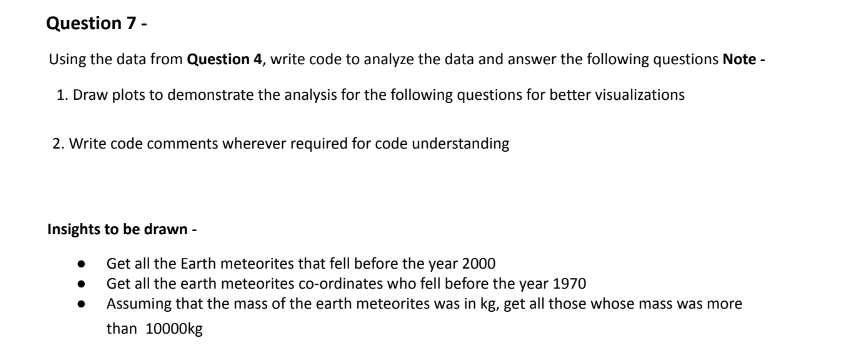

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's Use the Data from Question 4 as asked in the Question

In [2]:
df = pd.read_excel('NasaMeteors.xlsx')

In [3]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Point Coordinate
0,Aachen,1,Valid,L5,21.0,Fell,1879-12-31 00:00:00,50.77500,6.08333,NaN,NaN,"[6, 50]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,NaN,NaN,"[10, 56]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,NaN,NaN,"[-113, 54]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01 00:00:00,16.88333,-99.90000,NaN,NaN,"[-99, 16]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01 00:00:00,-33.16667,-64.95000,NaN,NaN,"[-64, -33]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         988 non-null    object 
 1   id                           988 non-null    int64  
 2   nametype                     988 non-null    object 
 3   recclass                     988 non-null    object 
 4   mass                         960 non-null    float64
 5   fall                         988 non-null    object 
 6   year                         970 non-null    object 
 7   reclat                       988 non-null    float64
 8   reclong                      988 non-null    float64
 9   :@computed_region_cbhk_fwbd  133 non-null    float64
 10  :@computed_region_nnqa_25f4  134 non-null    float64
 11  Point Coordinate             988 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 92.8+ KB


## Get all the meteorites that fell before the year 2000

As we saw from the data above, our 'year' feature has become an object datatype. We have to change it back to Date And Time datatype before we further perform our Analysis. 

I will use a copy of this dataframe to perform all the analysis. 

In [64]:
df_copy = df.copy()

In [65]:
df_copy.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Point Coordinate
0,Aachen,1,Valid,L5,21.0,Fell,1879-12-31 00:00:00,50.77500,6.08333,NaN,NaN,"[6, 50]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,NaN,NaN,"[10, 56]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,NaN,NaN,"[-113, 54]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01 00:00:00,16.88333,-99.90000,NaN,NaN,"[-99, 16]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01 00:00:00,-33.16667,-64.95000,NaN,NaN,"[-64, -33]"


Probably due to using the xlxs file, the datatype of year, which was supposed to be date and time, has now become object. 

But changing it to date and time again is giving error. So, I decided to turn the whole column to string datatype and get the year using string slicing. 

In [67]:
df_copy['year'] = df_copy['year'].astype('str')
df_copy['year'] = df_copy['year'].str.replace("00:00:00", "")

In [68]:
df_copy['year'].isnull().sum()

0

In [45]:
# import numpy as np

# df_copy['year'] = df_copy['year'].fillna(0)


Now, using string slicing, let's just get the year from the year columns. 

but there will also be blank values in this column. Last time in Question 4, when we converted the year datatype to date and time, due to the years being out of the range provided by Pandas, it would cause errors. So, those specific years were converted to Nan.

But for this, i will change those blank values to 0. This is because we just need the years before 2000. Those meteors whose year of falling exceeded the range of pandas, will definitely be before 2000. So, Just making them 0 for our analysis will be better than leaving them outside.

In [69]:
df_copy['only_year'] = [int(i[:4]) if len(i)>4 else 0 for i in df_copy['year']]

In [70]:
df_copy.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Point Coordinate,only_year
0,Aachen,1,Valid,L5,21.0,Fell,1879-12-31,50.77500,6.08333,NaN,NaN,"[6, 50]",1879
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,NaN,NaN,"[10, 56]",1951
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,NaN,NaN,"[-113, 54]",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,NaN,NaN,"[-99, 16]",1976
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,NaN,NaN,"[-64, -33]",1902


In [71]:
df_copy['only_year'].isnull().sum()

0

<AxesSubplot:xlabel='only_year', ylabel='Count'>

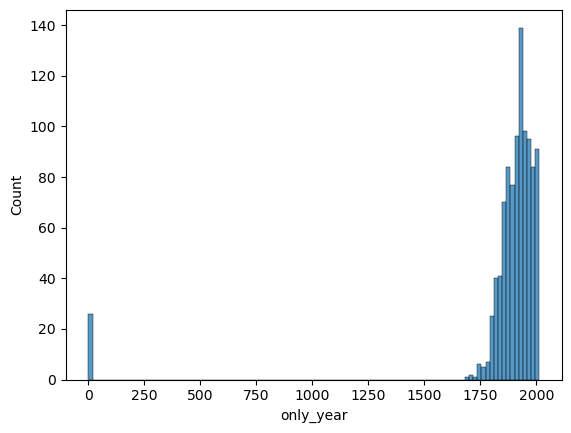

In [72]:
sns.histplot(df_copy['only_year'])

Let's make a new column which has <2000 for meteors that fell before 2000s and >=2000 for meteors that feel on or after 2000.

In [74]:
df_copy['bef_aft_2000'] = ["<2000" if i<2000 else ">=2000" for i in df_copy['only_year']]

In [75]:
df_copy.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Point Coordinate,only_year,bef_aft_2000
0,Aachen,1,Valid,L5,21.0,Fell,1879-12-31,50.77500,6.08333,NaN,NaN,"[6, 50]",1879,<2000
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,NaN,NaN,"[10, 56]",1951,<2000
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,NaN,NaN,"[-113, 54]",1952,<2000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,NaN,NaN,"[-99, 16]",1976,<2000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,NaN,NaN,"[-64, -33]",1902,<2000


Let's Plot 

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bef_aft_2000', ylabel='count'>

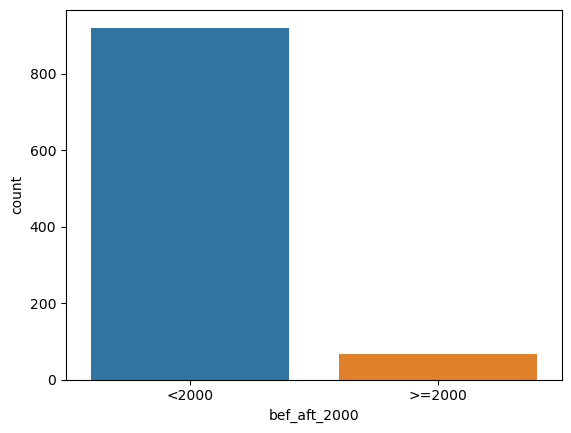

In [78]:
sns.countplot(df_copy['bef_aft_2000'])

<AxesSubplot:title={'center':'Meteors Falling Before And After 2000'}, ylabel='bef_aft_2000'>

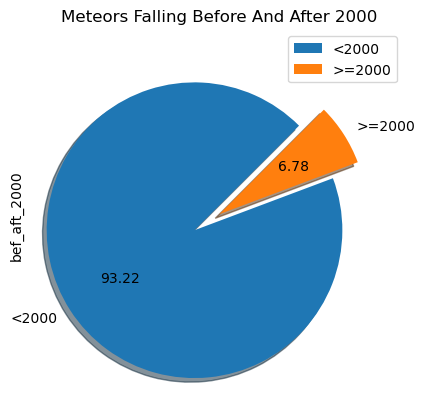

In [80]:
df_copy['bef_aft_2000'].value_counts().plot.pie(startangle = 45, legend=True, shadow=True, explode=(0.2, 0), title="Meteors Falling Before And After 2000", autopct="%.2f")

In [83]:
df_copy[df_copy['bef_aft_2000']=='<2000'].head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Point Coordinate,only_year,bef_aft_2000
0,Aachen,1,Valid,L5,21.0,Fell,1879-12-31,50.77500,6.08333,NaN,NaN,"[6, 50]",1879,<2000
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,NaN,NaN,"[10, 56]",1951,<2000
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,NaN,NaN,"[-113, 54]",1952,<2000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,NaN,NaN,"[-99, 16]",1976,<2000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,NaN,NaN,"[-64, -33]",1902,<2000


In [84]:
df_copy[df_copy['bef_aft_2000']=='<2000'].shape

(921, 14)

In [85]:
df_copy[df_copy['bef_aft_2000']=='>=2000'].shape

(67, 14)

##### Conclusion: 921 Meteors or 93.22% of the meteors in the dataset fell before 2000. Only 67 meteors or 6.78% of the meteors in the dataset fell after 2000.

## Get all the earth Meteors Coordinates that fell before 1970.

For this, we will be using reclong, and retlat features to get the coordinates. As we are using the data from the Question4, we have already changed the point coordinates to list of int.

So, instead of getting them from our data, we will instead use the reclong and reclat as they both are the exact longitude and Latitude of the meteors fall site. 

In [87]:
df_copy[['only_year', 'reclong', 'reclat']].head()

,only_year,reclong,reclat
0,1879,6.08333,50.77500
1,1951,10.23333,56.18333
2,1952,-113.00000,54.21667
3,1976,-99.90000,16.88333
4,1902,-64.95000,-33.16667


Let's make a separate dataframe for this analysis.

In [92]:
df_coordinates = df_copy[['name','only_year', 'reclong', 'reclat']]

Now, we can even make a separate column to show the longitude and latitude together.

In [98]:
df_coordinates['Meteor_Coordinates']= [[i, j]for i,j in zip(df_coordinates['reclat'], df_coordinates['reclong'])]
        

C:\Users\OmGusain\AppData\Local\Temp\ipykernel_15096\2263232756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coordinates['Meteor_Coordinates']= [[i, j]for i,j in zip(df_coordinates['reclat'], df_coordinates['reclong'])]


In [100]:
df_coordinates[df_coordinates['only_year']<1970].head()

,name,only_year,reclong,reclat,Meteor_Coordinates
0,Aachen,1879,6.08333,50.77500,"[50.775, 6.08333]"
1,Aarhus,1951,10.23333,56.18333,"[56.18333, 10.23333]"
2,Abee,1952,-113.00000,54.21667,"[54.21667, -113.0]"
4,Achiras,1902,-64.95000,-33.16667,"[-33.16667, -64.95]"
5,Adhi Kot,1919,71.80000,32.10000,"[32.1, 71.8]"


In [101]:
df_coordinates[df_coordinates['only_year']<1970].shape

(775, 5)

##### Conclusion: A total of 775 meteors fell before 1970. The above code shows the coordinates of each Fallen meteor. 

## Get all the Meteors whose Mass was more than 10000kg

In [105]:
df_copy['mass'].isnull().sum()

28

I will not use any method to fill the blanks in the the mass column. The reason for there being no Values in this column can be that the meteors had no mass, i.e., they completey burned down.

So, instead of randomly using the mean, median or highest frequency to fill those blank spaces, its better to just use the data that we already have first. 

Let's get all the meteors with mass more than 10000kg

In [115]:
df_copy[df_copy['mass']>10000].head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Point Coordinate
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,NaN,NaN,"[-113, 54]"
7,Agen,392,Valid,H5,30000.0,Fell,1813-12-31 00:00:00,44.21667,0.61667,NaN,NaN,"[0, 44]"
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01 00:00:00,19.08333,8.38333,NaN,NaN,"[8, 19]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01 00:00:00,39.91667,42.81667,NaN,NaN,"[42, 39]"
27,Alfianello,466,Valid,L6,228000.0,Fell,1882-12-31 00:00:00,45.26667,10.15000,NaN,NaN,"[10, 45]"


Let's create a new column to help us plot this

In [116]:
df_copy['gt_lt_10000'] = ["<=10000" if i<10000 else ">10000" for i in df_copy['mass']]

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gt_lt_10000', ylabel='count'>

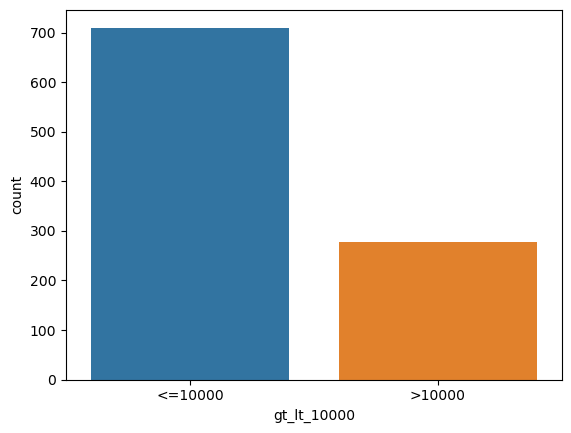

In [117]:
sns.countplot(df_copy['gt_lt_10000'])

<AxesSubplot:xlabel='gt_lt_10000', ylabel='Count'>

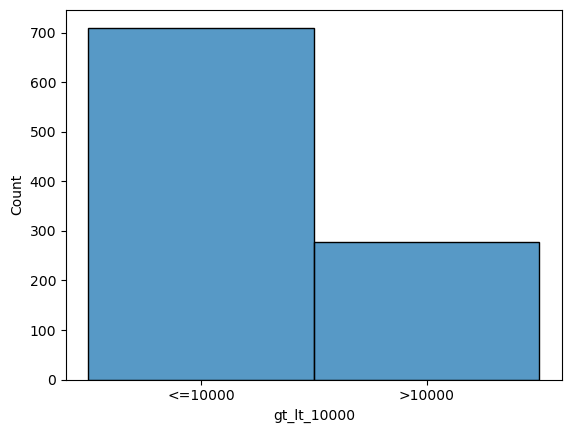

In [118]:
sns.histplot(df_copy['gt_lt_10000'])

In [121]:
df_copy['gt_lt_10000'].value_counts(normalize=True)*100

<=10000    71.862348
>10000     28.137652
Name: gt_lt_10000, dtype: float64

<AxesSubplot:title={'center':'Mass Of Fallen Meteors Over years'}, ylabel='gt_lt_10000'>

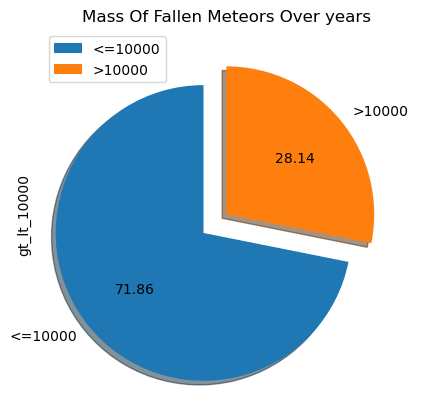

In [122]:
df_copy['gt_lt_10000'].value_counts().plot.pie(startangle=90, explode=(0.2, 0), legend=True, shadow=True, title="Mass Of Fallen Meteors Over years", autopct="%.2f")

In [124]:
df_copy[df_copy['mass']>10000].shape

(243, 13)

In [125]:
df_copy[df_copy['mass']<=10000].shape

(717, 13)

##### Conclusion: As we can see, 28.14% of the meteors or 243 meteors had mass over 10000kg. And 717 meteors or 71.86% of the meteors had mass less or equal to 10000kg.